# Simple Monte Carlo simulation

saw it [here](https://youtu.be/7ESK5SaP-bc?si=HUOp7TQbOhlvoIaZ) first, great video<br>

In [54]:
import math
import matplotlib as plt
import random

In [55]:
random.seed(91460)
# can replicate

In [56]:
# for i in range(10):
#   print(random.uniform(-1,1))
points=[]
for i in range(10):
  x=round(random.uniform(-1,1),5) # 5 decimal places
  y= round(random.uniform(-1,1),5)
  points.append((x,y))

points[:5]

[(-0.91634, -0.00187),
 (0.90567, 0.71084),
 (0.94742, -0.18063),
 (0.97791, 0.96167),
 (0.00645, -0.9691)]

to be inside the inscribed unit circle<br>the point will have to satisfy the condition: **x^2+y^2<=1**

In [57]:
inside=[]
for(x,y) in points:
  if(x**2+y**2<=1):
    inside.append(True)
  else :
    inside.append(False)

inside

[True, False, True, False, True, True, True, True, True, True]

trying to estimate for very small sample

In [58]:
count_inside = sum(inside)
pi_est = 4 * count_inside / len(points)
pi_est

3.2

In [60]:
# function to try diff n vals
def monte_carlo_pi(n):
  count=0
  for i in range(n):
    x=round(random.uniform(-1,1),5) # 5 decimal places
    y= round(random.uniform(-1,1),5)
    if(x**2 + y**2<=1):
      count+=1
  return 4*count/n;

trying higher n values since it will converge better with higher n

In [61]:
for n in [100, 1000,5000,20000, 50000]:
  print(n, monte_carlo_pi(n))

100 3.28
1000 3.084
5000 3.1688
20000 3.1362
50000 3.13968


In [62]:
monte_carlo_pi(100000)

3.1408

In [64]:
monte_carlo_pi(5000000)

3.141604

we can track convergence to see it step by step<br>
also removing the rounding part

this should be pretty close

In [88]:
n_trials=10000000
estimates=[]
xs=[]
ys=[]
inside= 0
for i in range(1,n_trials+1):
    x=random.uniform(-1,1)
    y= random.uniform(-1,1)
    xs.append(x)
    ys.append(y)
    if (x**2+y**2<=1):
        inside+=1
    pi_est=4*inside/i
    estimates.append(pi_est)
    if i%500000==0:   # print every 500k
        print(f"After {i} points: pi≈ {pi_est}")

After 500000 points: pi≈ 3.142248
After 1000000 points: pi≈ 3.142032
After 1500000 points: pi≈ 3.141426666666667
After 2000000 points: pi≈ 3.140936
After 2500000 points: pi≈ 3.1410672
After 3000000 points: pi≈ 3.1407693333333335
After 3500000 points: pi≈ 3.1404834285714287
After 4000000 points: pi≈ 3.140619
After 4500000 points: pi≈ 3.1407964444444443
After 5000000 points: pi≈ 3.1408128
After 5500000 points: pi≈ 3.140807272727273
After 6000000 points: pi≈ 3.1408466666666666
After 6500000 points: pi≈ 3.140830769230769
After 7000000 points: pi≈ 3.1407777142857145
After 7500000 points: pi≈ 3.1410853333333333
After 8000000 points: pi≈ 3.140771
After 8500000 points: pi≈ 3.1409270588235296
After 9000000 points: pi≈ 3.1410604444444443
After 9500000 points: pi≈ 3.141005052631579
After 10000000 points: pi≈ 3.1411444


Monte Carlo Pi (N=10000000) ≈ 3.141


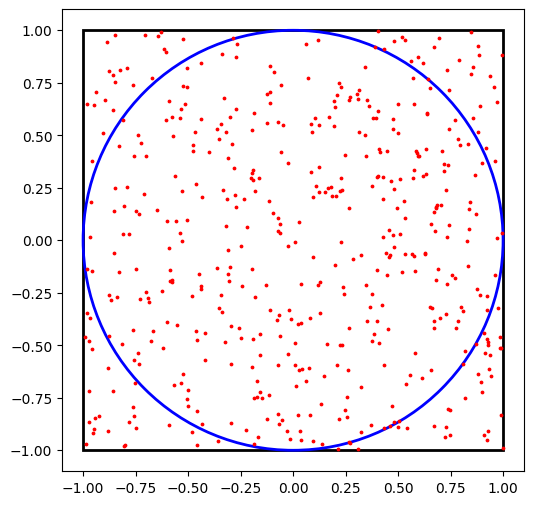

In [90]:
import matplotlib.patches as patches
sample_size=500 # smaller number just to plot
sample_indices=random.sample(range(len(xs)), sample_size)
sample_xs=[xs[i] for i in sample_indices] # we created xs and ys above
sample_ys=[ys[i] for i in sample_indices]

# plotting
fig,ax=plt.subplots(figsize=(6,6))

# draw square+circle
square=patches.Rectangle((-1, -1), 2,2,fill=False, edgecolor="black", linewidth=2)
circle=plt.Circle((0, 0), 1, fill=False,edgecolor="blue", linewidth=2)
ax.add_patch(square)
ax.add_artist(circle)

#scatter points
ax.scatter(sample_xs,sample_ys,c='red',s=3)
# aspect ratio,limits, and title
ax.set_aspect("equal")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
print(f"Monte Carlo Pi (N={n_trials}) ≈ {pi_est:.3f}")
plt.show()

actually it was converging pretty closely early on as well<br>lets try with a much smaller num

In [97]:
n_trials=1000
estimates=[]
xs=[]
ys=[]
inside= 0
for i in range(1,n_trials+1):
    x=random.uniform(-1,1)
    y= random.uniform(-1,1)
    xs.append(x)
    ys.append(y)
    if (x**2+y**2<=1):
        inside+=1
    pi_est=4*inside/i
    estimates.append(pi_est)
    if i%100==0:   # print every 100
        print(f"After {i} points: pi≈ {pi_est}")

After 100 points: pi≈ 3.16
After 200 points: pi≈ 3.32
After 300 points: pi≈ 3.2
After 400 points: pi≈ 3.19
After 500 points: pi≈ 3.184
After 600 points: pi≈ 3.1733333333333333
After 700 points: pi≈ 3.1485714285714286
After 800 points: pi≈ 3.15
After 900 points: pi≈ 3.16
After 1000 points: pi≈ 3.14


Monte Carlo Pi (N=1000) ≈ 3.140


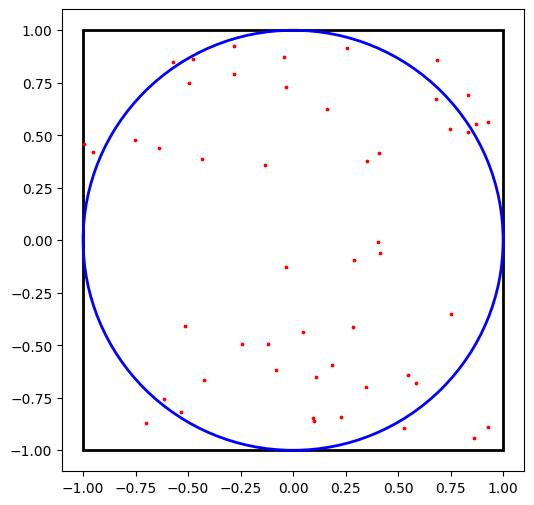

In [99]:
import matplotlib.patches as patches
sample_size=50 # smaller number just to plot
sample_indices=random.sample(range(len(xs)), sample_size)
sample_xs=[xs[i] for i in sample_indices] # we created xs and ys above
sample_ys=[ys[i] for i in sample_indices]

# plotting
fig,ax=plt.subplots(figsize=(6,6))

# draw square+circle
square=patches.Rectangle((-1, -1), 2,2,fill=False, edgecolor="black", linewidth=2)
circle=plt.Circle((0, 0), 1, fill=False,edgecolor="blue", linewidth=2)
ax.add_patch(square)
ax.add_artist(circle)

#scatter points
ax.scatter(sample_xs,sample_ys,c='red',s=3)
# aspect ratio,limits, and title
ax.set_aspect("equal")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
print(f"Monte Carlo Pi (N={n_trials}) ≈ {pi_est:.3f}")
plt.show()

nice